In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import plotly.express as px
import seaborn as sns

In [3]:
df_2015 = pd.read_csv('dataset/2015.csv')
df_2016 = pd.read_csv('dataset/2016.csv')
df_2017 = pd.read_csv('dataset/2017.csv')
df_2018 = pd.read_csv('dataset/2018.csv')
df_2019 = pd.read_csv('dataset/2019.csv')

In [4]:
# for 2015 and 2016
df_list = [df_2015, df_2016]  

for df in df_list:
    df.columns = [x.strip().replace(' ', '_').lower() for x in df.columns]
    df.rename(columns={'economy_(gdp_per_capita)': 'economy', 'health_(life_expectancy)': 'health', 'trust_(government_corruption)': 'trust'}, inplace=True)

In [5]:
# for 2017
df_2017.columns = [x.strip().replace('.', '_').lower() for x in df_2017.columns]
df_2017.rename(columns={'economy__gdp_per_capita_': 'economy', 'health__life_expectancy_': 'health', 'trust__government_corruption_': 'trust'}, inplace=True)

In [ ]:
# for 2018 an 2019
df_list_2 = [df_2018, df_2019]
for df in df_list_2:
    df.columns = [x.strip().replace(' ', '_').lower() for x in df.columns]
    df.rename(columns={'overall_rank': 'happiness_rank', 'country_or_region': 'country', 'score': 'happiness_score', 'gdp_per_capita': 'economy', 'healthy_life_expectancy': 'health', 'freedom_to_make_life_choices': 'freedom', 'perceptions_of_corruption': 'trust'}, inplace=True)

In [32]:
df_2015[df_2015['country'] == 'India']

,country,region,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia_residual
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513


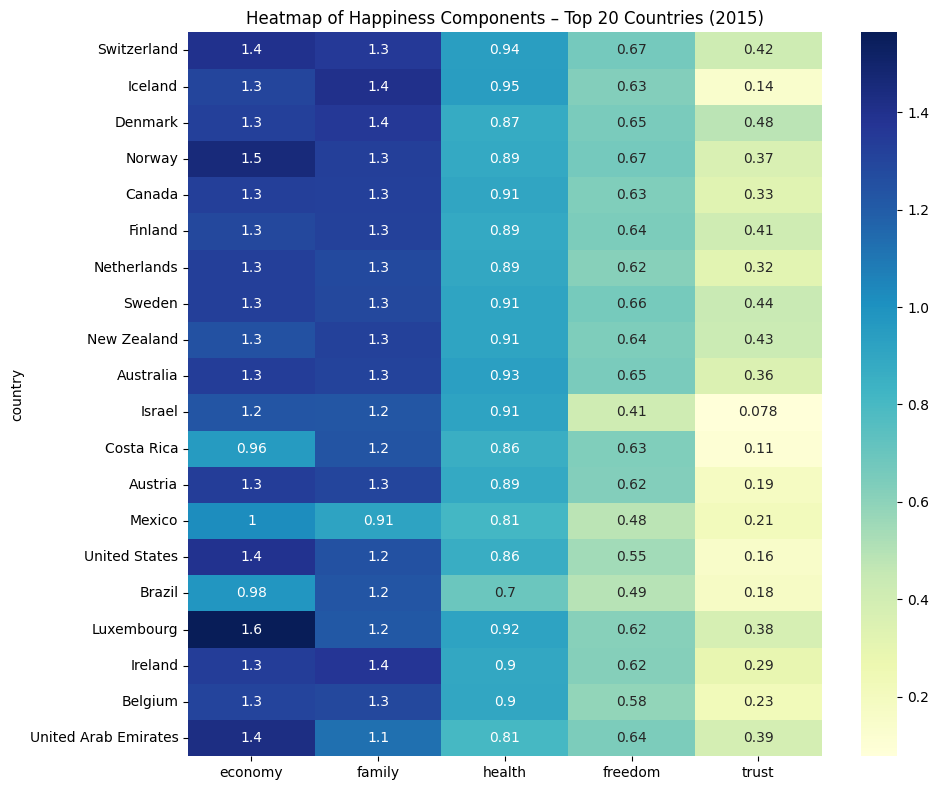

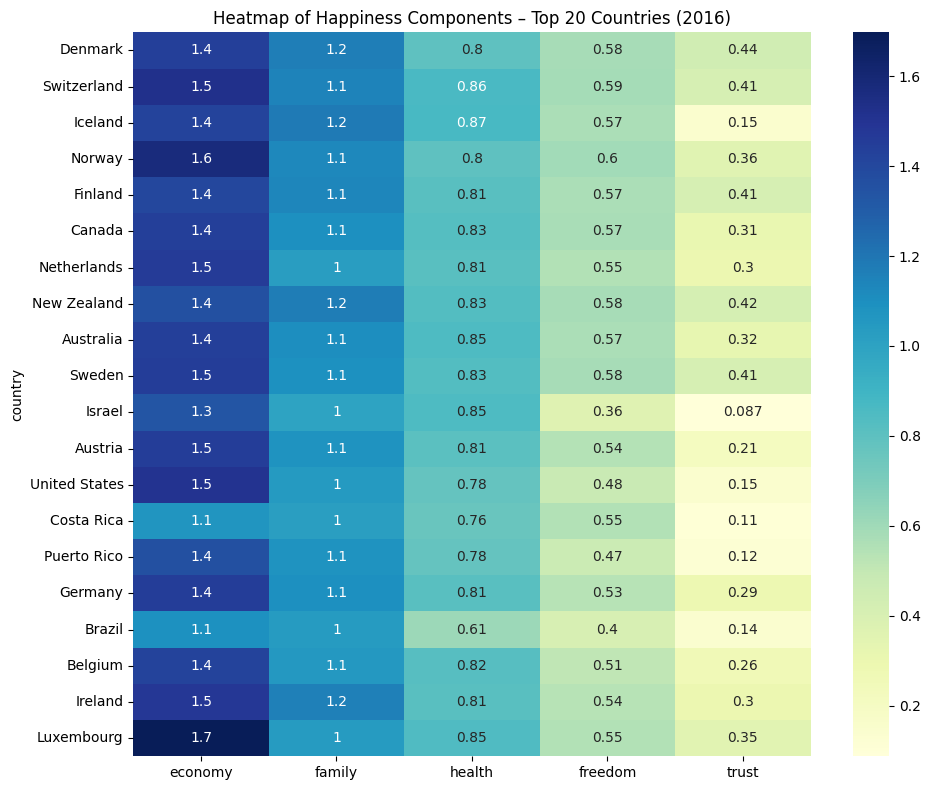

In [41]:
years = [2015, 2016]  # List of years corresponding to DataFrames

for df, year in zip(df_list, years):

    # interactive plot
    fig = px.bar(df.sort_values('happiness_score', ascending=False),
                 x='happiness_score', y='country',
                 color='region',
                 orientation='h',
                 title=f'Happiness Scores by Country ({year})')
    fig.update_layout(width=1800, height=1200) 
    fig.show()

    # choropleth map
    fig = px.choropleth(df,
                    locations="country",
                    locationmode="country names",
                    color="happiness_score",
                    hover_name="country",
                    color_continuous_scale="Viridis",
                    title=f"World Happiness Score ({year})")

    fig.update_layout(width=1600, height=800)
    fig.show()

    # heat map (country x components)
    components = ['economy', 'family', 'health', 'freedom', 'trust']
    top_n = df.sort_values('happiness_score', ascending=False).head(20)
    plt.figure(figsize=(10, 8))
    sns.heatmap(top_n.set_index('country')[components], annot=True, cmap='YlGnBu')
    plt.title(f"Heatmap of Happiness Components – Top 20 Countries ({year})")
    plt.tight_layout()
    plt.show()

    # interactive plot
    melted = df.melt(id_vars='country', value_vars=components, var_name='components', value_name='Score')
    top_20 = df.nlargest(20, 'happiness_score')['country']
    melted = melted[melted['country'].isin(top_20)]

    fig = px.bar(melted, x='Score', y='country', color='components', orientation='h', title=f'Happiness Component Breakdown (Top 20 Countries - {year})')
    fig.update_layout(barmode='stack', height=800, width=1000)
    fig.show()

